In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [26]:
gpu_data = pd.read_csv('gpu.csv', index_col=0)

(2e-06, 3e-05)

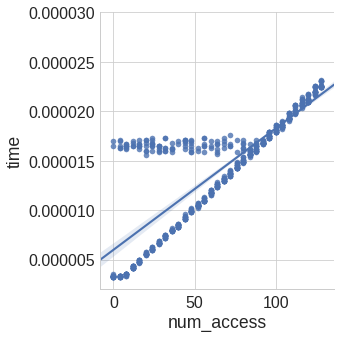

In [27]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(2e-6, 3e-5)

(2e-06, 3e-05)

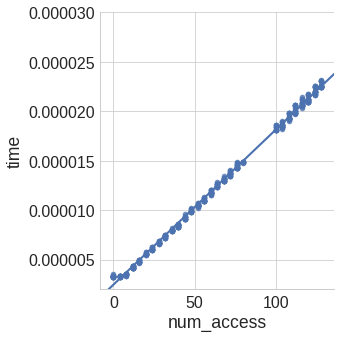

In [28]:
filtered_gpu_data = gpu_data[(gpu_data['time']<0.000015) | (gpu_data['time']>0.000018)]
lm2 = sns.lmplot('num_access', 'time', filtered_gpu_data)
lm2.axes[0, 0].set_ylim(2e-6, 3e-5)

In [29]:
result = sm.ols(formula="time ~ num_access", data=filtered_gpu_data).fit()
result.params

Intercept     2.450188e-06
num_access    1.567482e-07
dtype: float64

### Conclusion
Each l1 hit takes 150 cycle?

In [30]:
sim_data = pd.read_csv('sim.csv', index_col=0)

In [31]:
full_data = gpu_data.append(sim_data, ignore_index=True)

(2e-06, 3e-05)

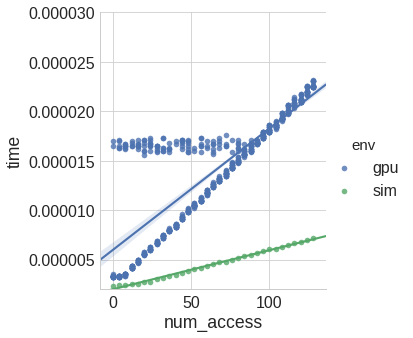

In [32]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env')
lm3.axes[0, 0].set_ylim(2e-6, 3e-5)

### Conclusion

Simulation result has a good starting point estimation. But L1 hit is seriously under-estimated. Or the L1 is not really used in this case?